In [1]:
import torch

import matplotlib.pyplot as plt

## Fake Data

In [2]:
N = 512

# x = torch.linspace(-3, 3, N)
exponents = torch.tensor([1, 2, 3])
xx = torch.linspace(-3, 3, N)
x = xx.unsqueeze(-1).pow(exponents)

# y = 4 * x + 0.1
y = torch.sin(xx).unsqueeze(-1)

x.shape, y.shape

(torch.Size([512, 3]), torch.Size([512, 1]))

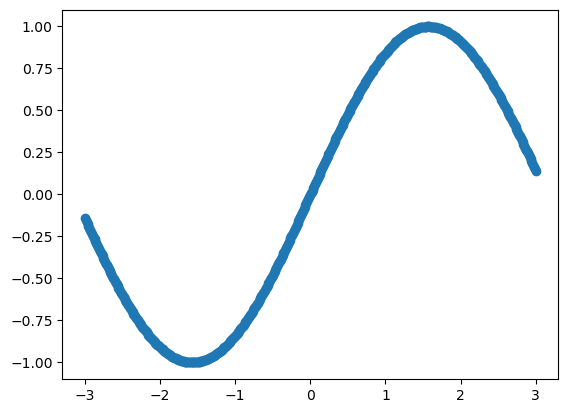

In [3]:
# plt.scatter(x, y)
plt.scatter(xx, y);

## Linear Model

In [4]:
# model = torch.nn.Linear(in_features=1, out_features=1)

class NeuralNetwork(torch.nn.Module):
    def __init__(self, nx, nh, ny):
        super().__init__()

        # Hidden layer
        self.linear1 = torch.nn.Linear(in_features=nx, out_features=nh)
        self.sigmoid = torch.nn.ReLU()

        # Output layer
        self.linear2 = torch.nn.Linear(in_features=nh, out_features=ny)

    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)
        x = self.linear2(x)
        return x

nx = x.shape[1]
ny = y.shape[1]
nh = 32
model = NeuralNetwork(nx, nh, ny)

## Test Initial Model

In [5]:
yhat = model(x)

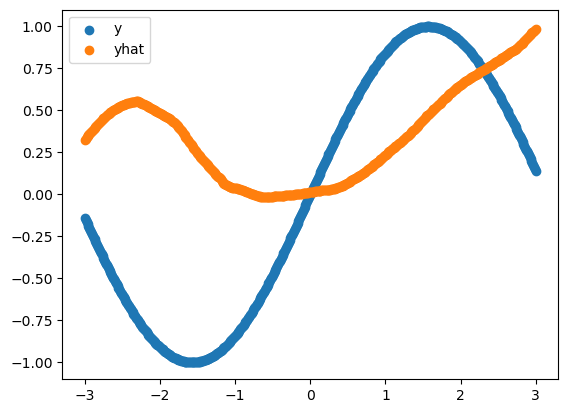

In [6]:
plt.scatter(xx, y, label="y")
plt.scatter(xx, yhat.detach().numpy(), label="yhat")
plt.legend();

## Train Model

In [7]:
# model = torch.nn.Linear(in_features=1, out_features=1)
model = NeuralNetwork(nx, nh, ny)

beta_m = 0.9
momentums = [torch.zeros_like(p) for p in model.parameters()]

learning_rate = 0.01
num_epochs = 100
loss_fn = torch.nn.MSELoss()

losses = []

t = 1

for epoch in range(num_epochs):

    yhat = model(x)

    loss = loss_fn(y, yhat)
    losses.append(loss.detach())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param, momentum in zip(model.parameters(), momentums):
            # print(param.shape)
            momentum.set_(beta_m * momentum + (1 - beta_m) * param.grad)
            # momentum = beta_m * momentum + (1 - beta_m) * param.grad
            mhat = momentum / (1 - beta_m ** t)
            # param -= learning_rate * momentum
            param -= learning_rate * mhat

    # print(momentums[1])
    t += 1

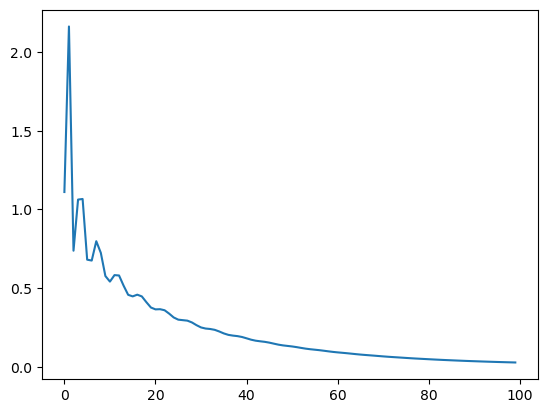

In [8]:
plt.plot(losses);

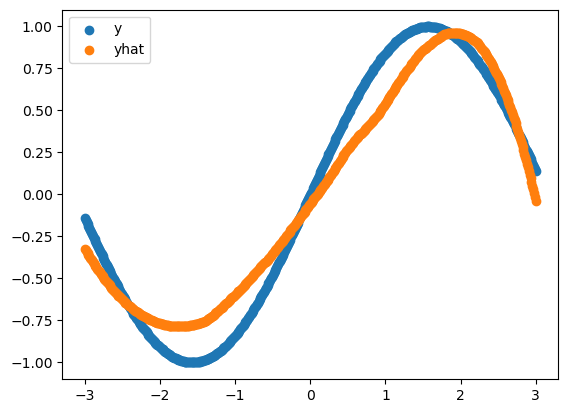

In [9]:
plt.scatter(xx, y, label="y")
plt.scatter(xx, yhat.detach().numpy(), label="yhat")
plt.legend();

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1285,  0.5144, -0.4809],
         [-0.1004,  0.3992, -0.1872],
         [ 0.3641,  0.3453,  0.0112],
         [-0.2571, -0.4842, -0.5313],
         [-0.1877,  0.2234,  0.4863],
         [-0.3942, -0.0550, -0.2093],
         [ 0.1539,  0.4438,  0.1388],
         [ 0.4647, -0.0847, -0.2625],
         [ 0.2674, -0.0325, -0.3363],
         [ 0.0756, -0.4941, -0.1759],
         [-0.5513,  0.1005,  0.5094],
         [ 0.4800,  0.5590,  0.0100],
         [-0.2358,  0.3891,  0.1036],
         [-0.1928, -0.3384,  0.3940],
         [-0.4655,  0.5293, -0.1543],
         [-0.3390,  0.2146, -0.4676],
         [-0.5107,  0.3801, -0.3060],
         [ 0.1613,  0.3358, -0.3002],
         [-0.1894, -0.3716,  0.3485],
         [-0.2683, -0.2143,  0.3278],
         [ 0.5989, -0.4358,  0.4552],
         [ 0.2777,  0.2902, -0.0941],
         [-0.1183, -0.5344,  0.0365],
         [-0.1559, -0.0932, -0.1683],
         [ 0.1869,  0.5587,  0.1557],
         [ 0.2190,  0.1527,